In [185]:
from PIL import Image
import numpy as np

In [186]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
x = np.array(Image.open('../image/jerem.jfif').convert('L'))
xref = x
h = 1/16 * np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

h = np.ones((15,15))
h = h / np.linalg.norm(h)**2

In [188]:
from algorithme.admmp2 import ADMMP2

In [252]:
cond_list = []

for nu in np.arange(0,1e-2, 1e-3):
    cond = np.linalg.cond(np.fft.ifft2(np.absolute(algo.A_fft)**2 + nu).real)
    cond_list.append(cond)

In [253]:
np.argmin(cond_list)

4

In [261]:
x_max = np.amax(x/255.)
lambd = 1e-3
mu = 2e-4
nu_min = 4e-3
nu = 2**8 * lambd * nu_min/(mu*x_max)

In [262]:
algo = ADMMP2(x/255., h, lambd=lambd, mu=mu, nu=nu)

In [263]:
y = algo.gaussian_filter_2d()

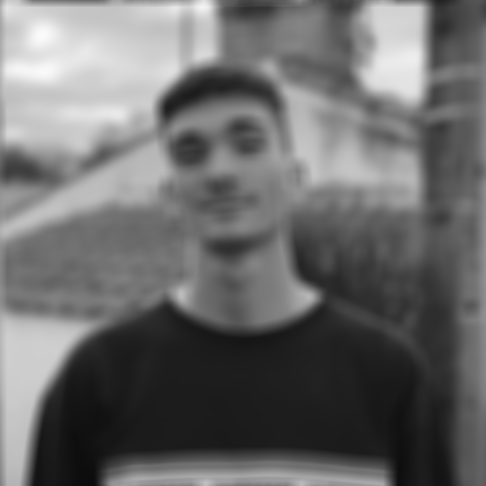

In [264]:
Image.fromarray(np.uint8(y*255))

In [267]:
X_, iter,tabError,tabTime = algo.fit_transform(y, eps=10e-3, stop=40)

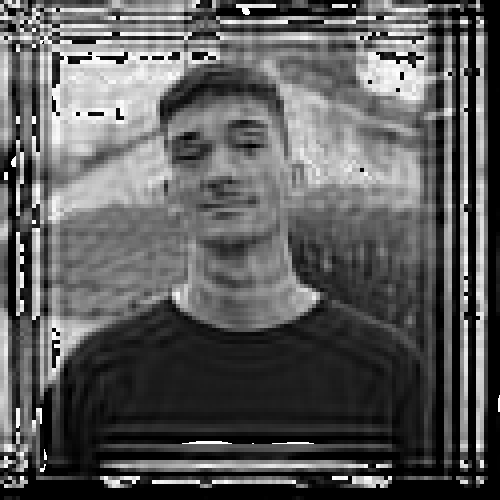

In [268]:
Image.fromarray(np.uint8(X_*255))